In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import curve_fit

In [8]:
t,x,y = np.loadtxt(r"D:\Versuch 223\Dokumente\Messungen\ALR\position_data.txt", delimiter=",", dtype="float",
                   unpack=True)

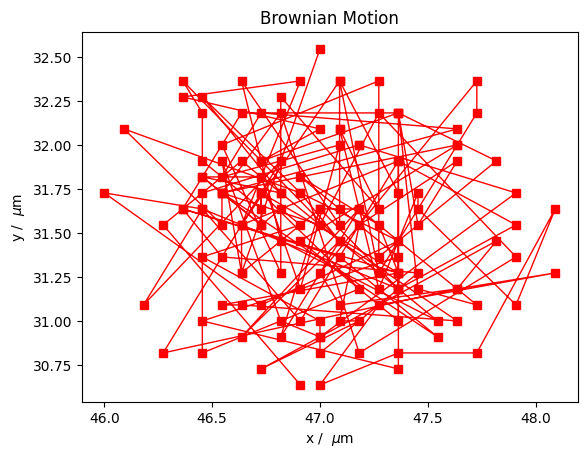

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(x, y, marker='s', color='red', linewidth=1)
plt.xlabel('x / '+' $\mu$'+'m')
plt.ylabel('y / '+' $\mu$'+'m')
plt.title('Brownian Motion')
plt.show()
plt.savefig('C:/Users/EDV/Desktop/ALR_brownian_motion_plot.pdf', format='PDF')

In [13]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i + 1
r_squared=dx**2+dy**2

In [15]:
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)
dt_mean_std=np.std(dt_mean)
print("dt_mean_std= ", dt_mean_std)

r_squared_mean=  0.5324624397226668
r_squared_mean_std=  0.03685759314574849
dt_mean=  1.0
dt_mean_std=  0.0


In [43]:
eta = 0.00096
deta= 0.00001
a = (755/2)*10**(-9)
da= 15*10**(-9)
T = 273.15+21.8
dT=0.2
k = (3*np.pi*eta*a*r_squared_mean*10**(-12))/(2*T*dt_mean)
print(k)

dk=k*np.sqrt((deta/eta)**2+(dT/T)**2+(r_squared_mean_std/r_squared_mean)**2+(dt_mean_std/dt_mean)**2)
print(dk)

#D=(k*T)/(6*np.pi*eta*r)
#dD=D*np.sqrt((dk/k)**2+(deta/eta)**2+(dr/r)**2+(dT/T)**2)
#print('Diffusionskoeffizient D=', D, 'pm', dD, 'm^2/s')

3.0829742544520296e-24
2.1581956789217716e-25


0.006666733333333331 0.5159329166936295


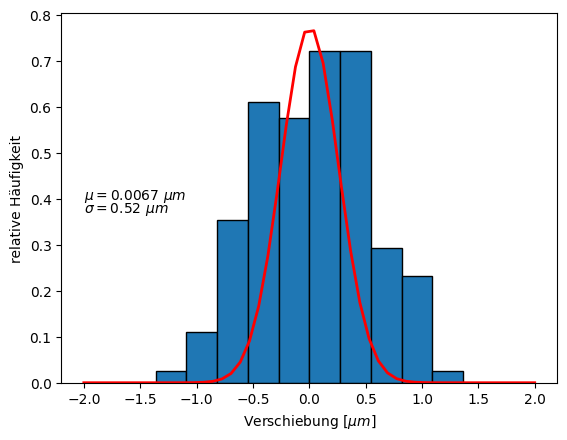

In [41]:
all_data=np.append(dx,dy)
plt.hist(all_data, density=True, edgecolor='black')

mu=np.mean(all_data)
sigma=np.std(all_data)
gauss = norm.pdf(np.linspace(-4,4), mu , sigma)

plt.plot(np.linspace(-2,2), gauss, '-', color='red', linewidth=2)

print (mu, sigma)


plt.ylabel('relative Häufigkeit')
plt.xlabel('Verschiebung $[\mu m]$')
plt.text(-2, 0.4, "$\mu=0.0067\ \mu m$")
plt.text(-2, 0.37, "$\sigma=0.52\ \mu m$")
plt.show()

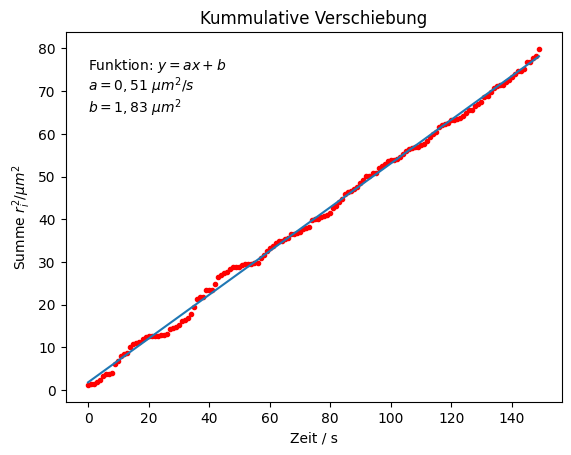

[0.51206451 1.83144232]


In [58]:
r_kumm=np.cumsum(r_squared)

def linear(x,a,b):
    return a*x+b
popt, pcov = curve_fit(linear, t[:-1], r_kumm)

plt.plot(t[:-1], r_kumm, marker='.', color='red', linewidth=0)
plt.plot(t[:-1], linear(t[:-1],*popt))
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kummulative Verschiebung')
plt.text(0,75,'Funktion: $y=ax+b$')
plt.text(0,70,'$a=0,51\ \mu m^2/s$')
plt.text(0,65,'$b=1,83\ \mu m^2$')
plt.show()
print(popt)

In [60]:
k2=popt[0]*10**(-12)*(6*np.pi*eta*a)/(4*T*dt_mean)
dk2=k2*np.sqrt((deta/eta)**2+(dT/T)**2+(da/a)**2+(np.sqrt(np.diag(pcov)[0])/popt[0])**2+(dt_mean_std/dt_mean)**2)
print(k,dk)

3.0829742544520296e-24 2.1581956789217716e-25
